# CS110 Pre-class Work - Tree search synthesis

## Question 1 [time estimate: 1 minute]

Fill in the code below for the method `insert` for a node in a BST. This should be a matter of copy-paste, as this is part of the pre-class work for lesson "Binary Search Trees (BSTs)."

In [42]:
## Binary Search Tree
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns the root"""
        #compare the input with node
        if self.data > node.data:
            #replace node
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            # fill children
            else:
                self.l_child.insert(node)
        else:
            #replace node
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
            # fill children
                self.r_child.insert(node)
        return self
        

## Question 2 [time estimate: 10 minutes]

Below you are provided the code for insertion in an AVL tree. However, to make it work, you need to complete the functions `left_rotate` and `right_rotate`. Use the pseudo-code `LEFT-ROTATE` in Cormen et al. and the one you wrote for `RIGHT-ROTATE` from lesson "Red-black trees—part II" to fill in the code.

In [43]:
## AVL Tree
##
class AVLNode(Node):
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val
        self.lr_balance = 0
        self.height = 0
    
    def get_violating_node(self, root):
        if self == root:
            return None
        if self == self.parent.r_child:
            if not self.parent.l_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = -1-self.height
            else:
                self.parent.height = max(self.parent.l_child.height, self.height) + 1
                self.parent.lr_balance = self.parent.l_child.height-self.height
        else:
            if not self.parent.r_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = self.height + 1
            else:
                self.parent.height = max(self.parent.r_child.height, self.height) + 1
                self.parent.lr_balance = self.height-self.parent.r_child.height
        if abs(self.parent.lr_balance) > 1:
            return self.parent
        else:
            return self.parent.get_violating_node(root)
                

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns the root"""

        violating_node = None
        curr_node = self
        root = self
        while curr_node:
            if curr_node.data > node.data:
                if curr_node.l_child is None:
                    curr_node.l_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.l_child 
            else:   
                if curr_node.r_child is None:
                    curr_node.r_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.r_child
        # fix up the tree
        violating_node = node.get_violating_node(root)
        
        while violating_node:
            x = violating_node
            if x.lr_balance < 0: # right heavy
                y = x.r_child
                if y.lr_balance < 0:
                    root = left_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = left_rotate(x, root)
                    x.lr_balance = -1
                    x.height -= 1
                    y.lr_balance = 1
                    y.height += 1 
                else:
                    z = x.r_child
                    y = z.l_child
                    root = right_rotate(z, root)
                    root = left_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1 
                    if y.lr_balance == -1: 
                        x.lr_balance = 1
                        z.lr_balance = 0
                    elif y.lr_balance == 0: 
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: 
                        x.lr_balance = 0
                        z.lr_balance = -1 
       
            else:
                y = x.l_child
                if y.lr_balance > 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 1
                    x.height -= 1
                    y.lr_balance = -1
                    y.height += 1
                else:
                    z = x.l_child 
                    y = z.r_child
                    root = left_rotate(z, root)
                    root = right_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1
                    if y.lr_balance == -1: # B: k-2, C: k-1
                        x.lr_balance = 0
                        z.lr_balance = 1
                    elif y.lr_balance == 0: # B=C=k-1
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: # B: k-1, C: k-2
                        x.lr_balance = -1
                        z.lr_balance = 0
            if root == y: 
                violating_node = None
                continue
            elif y == y.parent.l_child:
                y.parent.lr_balance = y.height - y.parent.r_child.height
                y.parent.height = max(y.height, y.parent.r_child.height) + 1
            elif y == y.parent.r_child:
                y.parent.lr_balance = y.parent.l_child.height - y.height
                y.parent.height = max(y.parent.l_child.height, y.height) + 1
            if abs(y.parent.lr_balance) > 1:
                violating_node = y.parent
            else: violating_node = None 
        return root

In [44]:

def left_rotate(x, root):
    """
    Performs left-rotation on x, returns the root. This 
    procedure does NOT update any augmented data (if any)
    of the nodes (e.g., height, left-right balance, etc.), 
    simply changing the pointers and the parent-child 
    relationship,and setting the new root (if any). The updating 
    task belongs to the procedure that calls this function.
    
    Parameters
    ----------
    x: node we need to fix (do rotation)
    root: root node    
    Returns
    -------
    root: final root of the tree
        
    """
    #define y as the right subtree of x
    y = x.r_child
    #exchange the place
    x.r_child = y.l_child
    if y.l_child != None:
        y.l_child.parent = x
    #replace y's parents
    y.parent = x.parent
    if x.parent == None:
        root = y
    elif x == x.parent.l_child:
        x.parent.l_child = y
    else:
        x.parent.r_child = y
    #replace x by the subtree of y
    y.l_child = x
    x.parent = y
    return root

In [45]:
def right_rotate(x, root):
    """
    Performs right-rotation on x, returns the root. This 
    procedure does NOT update any augmented data (if any)
    of the nodes (e.g., height, left-right balance, etc.), 
    simply changing the pointers and the parent-child 
    relationship,and setting the new root (if any). The updating 
    task belongs to the procedure that calls this function.

    Parameters
    ----------
    x: node we need to fix (do rotation)
    root: root node    
    Returns
    -------
    root: final root of the tree
    """
    #define y as the left sub-tree of x
    y = x.l_child
    x.l_child = y.r_child
    if y.r_child != None:
        y.r_child.parent = x
    #modify the parent y's parent by setting x's parent
    y.parent = x.parent
    if x.parent == None:
        root = y
    elif x == x.parent.r_child:
        x.parent.r_child = y
    else:
        x.parent.l_child = y
    #replace x by the subtree of y
    y.r_child = x
    x.parent = y
    return root

## Question 3 [time estimate: 17 minutes]
We will now use the code above to build a BST and an AVL by randomly inserting to the trees, then produce a plot to compare their expected heights. **Carefully** follow the instructions below to fill in the code.

### Question 3a [time estimate: 2 minutes]

Complete the function `height` to compute the height of a tree rooted at a node. This should also be a matter of copying and pasting because you can utilize what you wrote for `max_depth` in lesson "Randomly built BSTs" (recall that maximum depth of a tree rooted at a node is the node's height in the tree.)

In [46]:
import random
import numpy as np

def height(node):
    """    
    Parameters
    node: node of BST
    
    Returns
    h :height of BST
    """
    if not node:
        return 0
    else:
        leftheight = official_height(node.l_child)
        rightheight = official_height(node.r_child)
        return 1 + max(leftheight, rightheight)
    real_height = official_height(node) - 1
    
    return real_height -1


### Question 3b [time estimate: 15 minutes]
Fill in the `get_expected_height_stats` function below to get the data ready for plotting. You need to follow the template and the instructions written in the code to produce consistent data to plot. 

**Note**: Please remember to update the tree after adding one new node to that tree since the root may be changed!

In [47]:
import random 

def get_expected_height_stats(iterations):
    """
    Generate the data for plotting the expected heights of BST and AVL.
    
    Parameters
    ----------
    iterations : int
        The number of times to insert into the tree for eachvalue of the 
        number of nodes to insert. For each iteration, a height is computed. 
        After all the iterations, all the computed heights are averaged to
        get an estimate of the expected height. 
    
    Returns
    -------
    bst_expected_heights, avl_expected_heights : list of float
        Contains the expected heights for the two types of trees. Each 
        element in each list corresponds to one value of n, the number of 
        nodes in the tree. The values of n are taken from range(1,500,10) 
        
    """
    bst_expected_heights = []
    avl_expected_heights = []
    
    for n in range(1,500,10):
        sum_bst = 0
        sum_avl = 0
        # For each value of n, you need to insert n nodes to each tree for 
        # `iterations` times. For each iteration:
        for i in range(iterations):
            # 1. Create a list containing all integers from 0 to n-1
            vals = list(range(int(n)))
            # 2. SET A RANDOM SEED TO THE INDEX OF THE CURRENT ITERATION and
            # shuffle the list. For example, if your code is `for i in range(iterations)`,
            # then use random.seed(i). Also, see the sample code in the next step.
            random.seed(i)
            # 3. Create BST nodes and AVL nodes taking the values from the list 
            # and insert those nodes to the respective trees IN THAT ORDER.
            random.shuffle(vals)
            BSTnodes = [Node(val) for val in vals]
            AVLnodes = [AVLNode(val) for val in vals]
            bst_root = build_tree(BSTnodes)
            avl_root = build_tree(AVLnodes)
            # Do make use of these lines of code:
                # vals = list(range(int(n)))
                # random.seed(i)
                # random.shuffle(vals)
                # BSTnodes = [Node(val) for val in vals]
                # AVLnodes = [AVLNode(val) for val in vals]
            # 4. After inserting to both trees, compute the heights.
            sum_bst += height(bst_root)
            sum_avl += height(avl_root)
        bst_expected_heights.append(sum_bst/iterations)
        avl_expected_heights.append(sum_avl/iterations)
    return bst_expected_heights, avl_expected_heights

#quick function to build our tree
def build_tree(nodes):
    root = None
    for node in nodes:
        if not root:
            root = node
        else:
            root = root.insert(node)
    return root

In [51]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

assert(bst_expected_heights == [0.0, 5.3, 6.8, 7.8, 9.9, 10.2, 9.9, 11.2, 12.0, 12.2, 12.3, 
                                12.2, 12.1, 13.4, 13.2, 13.0, 14.3, 14.7, 13.8, 14.1, 14.5, 
                                15.5, 14.9, 16.0, 16.1, 16.2, 15.4, 17.5, 16.7, 16.1, 16.4, 
                                17.4, 16.1, 17.3, 16.8, 16.2, 16.7, 17.5, 17.1, 18.4, 17.5, 
                                17.0, 17.8, 18.4, 18.3, 17.8, 17.7, 17.3, 18.0, 19.5])
assert(avl_expected_heights == [0.0, 3.0, 4.1, 5.0, 5.4, 6.0, 6.0, 6.1, 6.8, 6.9, 7.0, 7.0, 
                                7.3, 7.3, 7.5, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.2, 8.2, 8.0, 
                                8.4, 8.5, 8.7, 8.8, 8.9, 8.8, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 
                                9.0, 9.0, 9.3, 9.1, 9.1, 9.3, 9.3, 9.7, 9.5, 9.6, 9.8, 9.8, 
                                9.9, 9.8])


AssertionError: 

In [0]:
#I am not sure about this error.

If you have done everything correctly, running the following code will produce a plot that compares the expected heights of BST and AVL tree. 

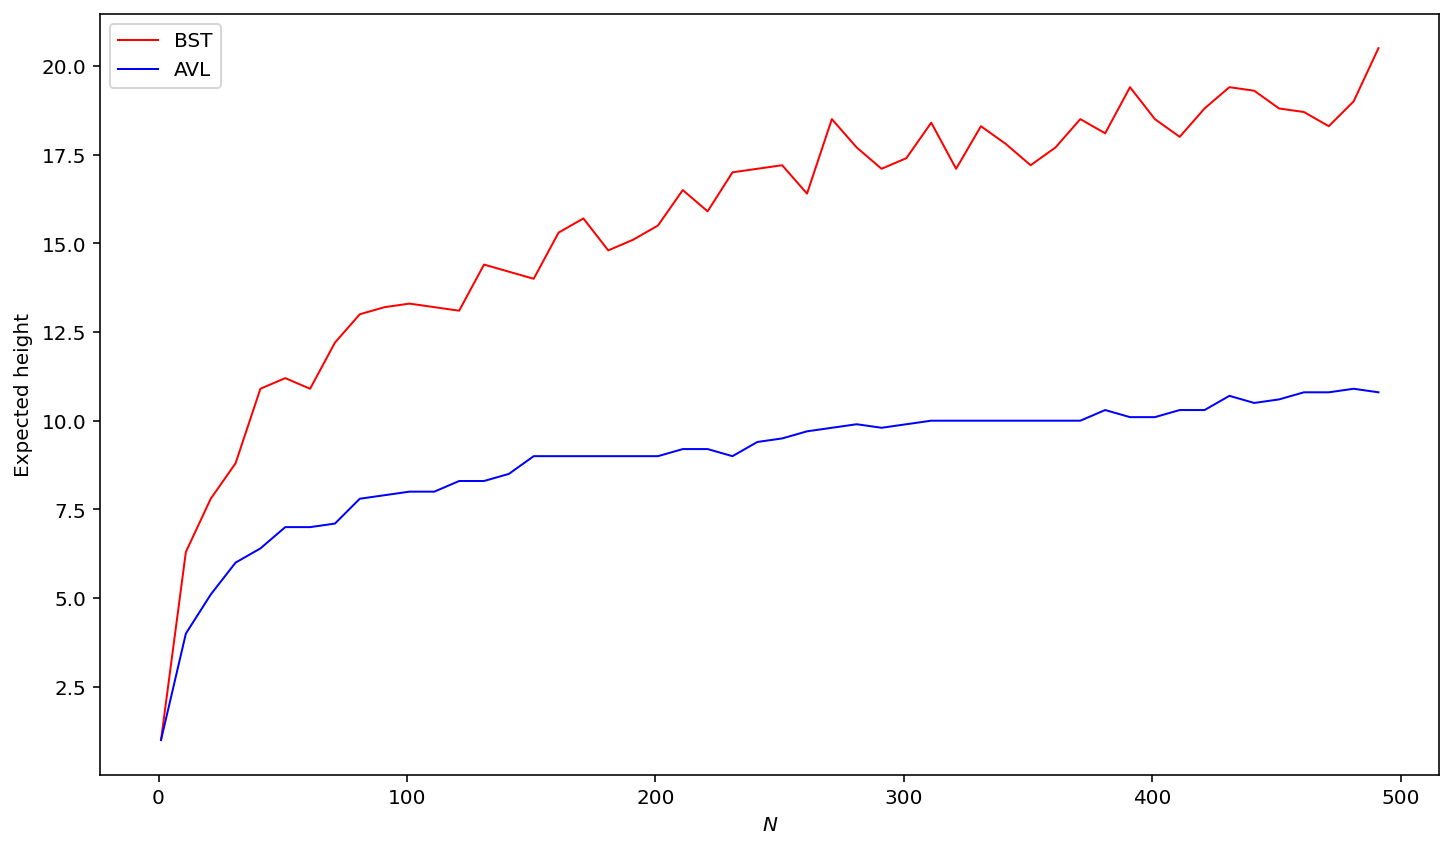

In [50]:
import matplotlib.pyplot as plt
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

plt.plot(range(1,500,10), bst_expected_heights, color = 'red',label = 'BST', linewidth = 1.0)
plt.plot(range(1,500,10), avl_expected_heights, color = 'blue',label = 'AVL', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('Expected height', fontsize=10)
plt.legend()
